In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from matplotlib.pylab import plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline;
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [28]:
mod = KNeighborsRegressor()

In [29]:
x , y = load_boston(return_X_y=True)

In [71]:
pipe = Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=2))
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=2))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=2),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 2,
 'model__p': 2,
 'model__weights': 'uniform'}

In [51]:
mod = GridSearchCV(pipe,
            param_grid={
                "model__n_neighbors":[1,2,3,4,5,6,7,8,9,10]
            })

In [52]:
mod.fit(x,y)

GridSearchCV(estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [57]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003519,0.000734,0.003300,0.000718,1,{'model__n_neighbors': 1},0.339313,0.423779,0.534566,0.486373,-1.623928,0.032020,0.830549,10
1,0.001722,0.000122,0.001906,0.000273,2,{'model__n_neighbors': 2},0.441649,0.547962,0.474980,0.496794,-0.548699,0.282537,0.417052,9
2,0.001591,0.000095,0.001850,0.000174,3,{'model__n_neighbors': 3},0.520304,0.593339,0.547746,0.513891,0.002980,0.435652,0.218139,8
3,0.001504,0.000033,0.001718,0.000173,4,{'model__n_neighbors': 4},0.547088,0.606925,0.509770,0.490452,0.211278,0.473103,0.136807,7
4,0.001492,0.000021,0.001724,0.000138,5,{'model__n_neighbors': 5},0.560895,0.619174,0.486619,0.469869,0.231330,0.473577,0.132431,6
5,0.001468,0.000006,0.001763,0.000095,6,{'model__n_neighbors': 6},0.582450,0.621194,0.509111,0.446859,0.250417,0.482006,0.130434,5
6,0.001454,0.000004,0.001758,0.000130,7,{'model__n_neighbors': 7},0.602434,0.636185,0.516102,0.442088,0.245749,0.488512,0.139022,4
7,0.001472,0.000015,0.001798,0.000153,8,{'model__n_neighbors': 8},0.615090,0.631185,0.551340,0.440117,0.239072,0.495361,0.144674,3
8,0.001473,0.000030,0.001835,0.000180,9,{'model__n_neighbors': 9},0.625314,0.630621,0.564464,0.429107,0.279376,0.505776,0.134503,1
9,0.001458,0.000005,0.001848,0.000142,10,{'model__n_neighbors': 10},0.614446,0.652489,0.555555,0.420648,0.261128,0.500853,0.143381,2


In [72]:
pipe.fit(x,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=2))])

In [73]:
pred = pipe.predict(x);

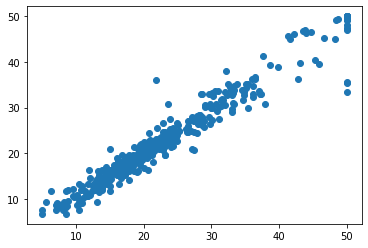

In [74]:
plt.scatter(y,pred)